In [97]:
using Revise, StatsBase, DataFrames, CSV, QARBoM, Random

In [138]:
df_n = DataFrame(CSV.File(raw"C:\Users\pedroripper\Downloads\normal_train.csv"; header = false))
df_f1 = DataFrame(CSV.File(raw"C:\Users\pedroripper\Downloads\fault_1_train.csv"; header = false))
df_f2 = DataFrame(CSV.File(raw"C:\Users\pedroripper\Downloads\fault_2_train.csv"; header = false))
df_f3 = DataFrame(CSV.File(raw"C:\Users\pedroripper\Downloads\fault_3_train.csv"; header = false))

df = vcat(df_f1, df_f2, df_f3, df_n )
df = df[shuffle(1:nrow(df))[1:4800], :]

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,62.946,53.461,28.364,59.107,21.363,40.407,42.672,42.457,43.441,40.148,17.399,50,0.292,3612.9,4470.7,9.4028,26.971,42.134,2697.5,75.925,120.38,0.33787,80.32,51.554,2625.3,24.049,48.238,3097.3,23.258,65.127,214.84,337.94,94.729,77.434,31.671,9.0032,26.442,6.9663,19.527,1.6405,32.356,13.756,23.737,1.4462,18.826,2.2679,4.928,2.4076,0.012569,0.86509,0.095876,53.094,44.118,0,0,0,1,1
2,63.222,54.039,25.009,61.726,22.579,39.51,39.614,47.918,47.077,40.584,18.776,50,0.25323,3644.5,4469.8,9.2872,26.864,42.348,2703.6,74.918,120.36,0.33771,80.218,50.515,2632.2,23.389,50.598,3099.0,22.65,65.746,226.48,341.46,94.512,77.269,31.914,9.0046,26.501,6.82,18.727,1.6537,33.319,13.784,23.719,1.1911,18.126,2.3059,4.8579,2.2797,0.010509,0.83572,0.095017,53.878,44.817,0,0,0,0,0
3,63.106,53.342,71.365,57.986,22.618,38.703,34.955,47.318,58.844,40.057,16.803,50,0.7264,3656.6,4441.7,8.894,26.88,42.418,2706.4,75.955,120.36,0.33219,79.96,48.931,2635.2,24.646,50.339,3101.5,23.465,67.88,265.89,343.18,94.725,76.963,32.224,8.7409,26.654,6.7662,18.431,1.6847,32.73,13.696,23.921,1.2194,18.661,2.3307,4.9685,2.2861,0.0061037,0.81636,0.10344,54.494,43.888,0,0,0,0,1
4,62.523,54.507,75.415,57.401,22.374,40.322,36.988,49.765,62.789,40.815,17.75,50,0.76828,3684.7,4509.7,8.9971,26.823,42.558,2703.6,74.099,120.39,0.34825,80.372,49.622,2633.2,24.336,51.396,3100.3,23.066,68.296,282.68,342.33,94.487,77.758,32.202,9.0326,26.064,6.934,18.892,1.698,33.4,13.86,23.432,1.406,17.928,2.3615,4.9406,2.3223,0.02661,0.8459,0.088042,54.405,43.091,0,0,0,0,1
5,62.714,53.989,28.724,62.252,21.534,40.499,37.131,43.369,50.649,40.945,19.371,50,0.29022,3692.3,4516.7,9.2318,26.925,42.278,2697.7,73.699,120.39,0.33122,80.409,49.671,2626.4,25.382,48.633,3098.4,22.459,66.17,243.76,339.2,94.547,77.216,31.921,9.0383,26.256,6.9161,19.545,1.6633,32.905,14.05,23.504,1.2385,19.269,2.288,4.7989,2.2096,0.01317,0.86686,0.1025,52.707,44.263,0,0,0,0,0
6,62.447,55.51,28.645,64.0,21.614,84.577,39.211,43.128,25.996,41.105,17.41,50,0.29352,3661.4,4668.9,9.7374,27.305,42.409,2687.3,74.218,120.38,0.70707,81.65,50.378,2615.4,23.207,48.528,3086.6,22.697,63.171,136.45,341.78,94.691,79.687,32.15,8.8897,26.784,7.0997,19.328,1.0314,33.058,13.753,24.19,1.2861,19.001,1.4237,5.1447,2.4311,-0.0018255,0.831,0.054488,54.268,43.748,0,0,0,1,0
7,63.578,53.011,61.437,58.889,19.655,34.854,40.18,44.971,45.434,39.952,19.647,50,0.62126,3736.2,4427.6,9.1291,26.559,42.486,2783.5,75.913,120.4,0.28885,79.216,50.707,2709.9,25.308,49.325,3202.6,22.346,64.881,225.39,325.65,94.822,76.628,28.896,8.7343,29.173,7.0176,19.18,1.6108,28.618,13.536,28.73,1.3527,19.194,2.1846,4.6452,2.1797,0.0061013,0.87692,0.093614,53.795,43.092,0,0,0,0,0
8,62.487,52.947,77.145,58.548,21.889,41.011,35.768,47.875,63.161,40.623,17.91,50,0.78439,3582.0,4437.5,8.6857,26.766,42.532,2690.1,74.497,120.39,0.3448,80.591,49.208,2619.0,24.826,50.579,3087.2,23.007,68.491,282.77,340.69,94.773,78.031,32.387,8.9447,25.359,6.7888,18.917,1.7358,33.022,13.868,22.944,1.3443,19.23,2.4024,4.9277,2.307,0.019791,0.84629,0.096906,53.356,43.

In [139]:
# df = DataFrame(CSV.File("./merged_data_train_less_normal.csv";header=false))

In [140]:
df_labels = select(df,([:Column54, :Column55, :Column56, :Column57, :Column58])) 
df_zscore = select(df,Not([:Column54, :Column55, :Column56, :Column57, :Column58]) .=> zscore) 
select!(df_zscore, Not(:Column12_zscore))
df_zscore = hcat(df_zscore, df_labels)

Row,Column1_zscore,Column2_zscore,Column3_zscore,Column4_zscore,Column5_zscore,Column6_zscore,Column7_zscore,Column8_zscore,Column9_zscore,Column10_zscore,Column11_zscore,Column13_zscore,Column14_zscore,Column15_zscore,Column16_zscore,Column17_zscore,Column18_zscore,Column19_zscore,Column20_zscore,Column21_zscore,Column22_zscore,Column23_zscore,Column24_zscore,Column25_zscore,Column26_zscore,Column27_zscore,Column28_zscore,Column29_zscore,Column30_zscore,Column31_zscore,Column32_zscore,Column33_zscore,Column34_zscore,Column35_zscore,Column36_zscore,Column37_zscore,Column38_zscore,Column39_zscore,Column40_zscore,Column41_zscore,Column42_zscore,Column43_zscore,Column44_zscore,Column45_zscore,Column46_zscore,Column47_zscore,Column48_zscore,Column49_zscore,Column50_zscore,Column51_zscore,Column52_zscore,Column53_zscore,Column54,Column55,Column56,Column57,Column58
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,-0.318076,-0.898846,-0.399256,-0.770067,-0.77415,-0.478254,1.56707,-1.74645,-0.196815,-1.71862,-0.291203,-0.382294,-1.52021,-0.840502,0.390275,0.331829,-1.00858,-0.45003,1.45257,-1.03155,-0.491253,-0.0843924,1.56748,-0.49184,-0.952313,-1.74678,-0.347219,0.498475,-0.311728,-0.103507,-1.15579,0.95616,-0.311514,-1.18103,0.535043,-0.0658713,0.774026,2.17476,0.404722,-0.948371,-0.429866,-0.546038,1.81718,0.5497,0.478227,0.248017,1.05382,-0.563476,1.01461,0.262114,-1.28571,0.584839,0,0,0,1,1
2,0.115056,-0.28562,-0.557166,0.377135,0.632301,-0.527506,0.544346,0.596225,0.075058,-0.994426,0.585801,-0.561792,-0.665023,-0.851865,0.0127249,-0.178524,-0.191879,-0.0146509,-0.146382,-2.07078,-0.492301,-0.252965,0.54487,-0.0116255,-1.58039,0.596199,-0.219418,-0.473728,0.0225358,0.115337,0.061743,-0.312369,-0.516865,-0.598713,0.54402,0.0566462,-0.570197,-0.117942,0.453682,0.738104,-0.296026,-0.572803,-0.601429,-1.0858,0.583892,-0.287763,-0.547472,-0.774701,0.00604918,0.21541,0.257205,1.94194,0,0,0,0,0
3,-0.0669851,-1.0251,1.62468,-1.2611,0.677409,-0.571817,-1.01383,0.338836,0.954906,-1.86977,-0.670793,1.6289,-0.337563,-1.20664,-1.27147,-0.10221,0.0752656,0.185195,1.5002,-2.07078,-0.528437,-0.679355,-1.01414,0.197164,-0.384185,0.339067,-0.031477,0.829471,1.17491,0.856286,0.656676,0.932777,-0.897697,0.144154,-1.14692,0.374361,-1.06452,-0.966243,0.568664,-0.293395,-0.716666,-0.27244,-0.333116,0.164189,0.652853,0.557562,-0.467345,-1.22641,-0.65877,0.673363,1.46949,0.138295,0,0,0,0,1
4,-0.981899,0.210902,1.8153,-1.51735,0.395194,-0.482921,-0.333902,1.38856,1.24988,-0.610736,-0.0676531,1.8228,0.422901,-0.348116,-0.934742,-0.37408,0.609555,-0.0146509,-1.44682,-0.511931,-0.423301,0.00154663,-0.334041,0.0579709,-0.679193,1.38844,-0.121689,0.191463,1.39955,1.17196,0.362668,-0.458513,0.0917206,0.0914346,0.723566,-0.850814,0.477249,0.354929,0.617995,0.879957,0.0672546,-0.999556,1.43605,-1.54842,0.738498,0.34432,-0.0141266,0.876243,0.355629,-0.163815,1.29434,-1.40908,0,0,0,0,1
5,-0.682159,-0.338667,-0.382312,0.60754,-0.576368,-0.473203,-0.286077,-1.35521,0.342145,-0.394807,0.964754,-0.390535,0.628578,-0.259739,-0.168212,0.112425,-0.459024,-0.435755,-2.08195,-0.511931,-0.534787,0.0626956,-0.285814,-0.415284,0.31622,-1.35463,-0.264524,-0.77914,0.251498,0.440219,-0.719971,-0.107768,-0.582826,-0.581939,0.760117,-0.452113,0.312782,2.22635,0.489289,0.0130776,0.975455,-0.892496,-0.152028,1.58474,0.534118,-0.738704,-1.42511,-0.501851,1.07539,0.622255,-2.04732,0.866355,0,0,0,0,0
6,-1.10117,1.27503,-0.38603,1.37322,-0.483838,1.94702,0.409565,-1.4586,-1.50122,-0.129047,-0.284197,-0.375256,-0.207662,1.66183,1.48308,1.92489,0.0409185,-1.17804,-1.25786,-1.03155,1.9257,2.11366

In [141]:
x_train = Vector{Vector{Float64}}()

for row in eachrow(df_zscore)
    push!(x_train, collect(row))
end

In [142]:
rbm_pcd = GRBMClassifier(57,40, 5)

GRBMClassifier([0.11691038213383505 -1.5741090967325668 … 0.9062282431287573 0.36738199773560054; 0.5127313821440002 -1.1895531563114248 … -0.17166906654179756 0.6849781473187335; … ; -0.08962347595697402 -0.12649497863880096 … -0.13898920841229914 -1.5633166157011609; -0.8051731516073246 1.0940258812841603 … 0.62175891368449 0.5177041686825009], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 57, 40, 5, Float64[], Float64[])

In [143]:
mse_pcd = QARBoM.train_pcd!(rbm_pcd, x_train; label_range = 56:57, n_epochs = 100, batch_size = 10, learning_rate = 0.001, threshold = 0.5)

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |    0.4542 |        0.0360 |       0.1690 |        0.0380 |    0.2430 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |    0.5021 |        0.0830 |       0.1070 |        0.1440 |    0.5770 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | T

|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    22 |    0.5342 |        0.0330 |       0.1580 |        0.0710 |    5.4780 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    23 |    0.5294 |        0.0200 |       0.1620 |        0.0370 |    5.6970 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|---------------------------

|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    43 |    0.5394 |        0.0930 |       0.1010 |        0.0700 |   10.6080 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    44 |    0.5460 |        0.0510 |       0.1320 |        0.0680 |   10.8590 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (

|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    64 |    0.5713 |        0.0620 |       0.1190 |        0.0930 |   15.8810 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    65 |    0.5565 |        0.0580 |       0.1110 |        0.0840 |   16.1340 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|---------------------------

|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    85 |    0.5746 |        0.0500 |       0.1170 |        0.0770 |   21.0150 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|    86 |    0.5771 |        0.0750 |       0.1520 |        0.0670 |   21.3090 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    Acc    | Time (

100-element Vector{Float64}:
 0.45416666666666666
 0.5020833333333333
 0.5427083333333333
 0.57
 0.5602083333333333
 0.5439583333333333
 0.5352083333333333
 0.52875
 0.525625
 0.5241666666666667
 0.529375
 0.5277083333333333
 0.535625
 ⋮
 0.5620833333333334
 0.5660416666666667
 0.5660416666666667
 0.5627083333333334
 0.5739583333333333
 0.5754166666666667
 0.5691666666666667
 0.5672916666666666
 0.561875
 0.5583333333333333
 0.559375
 0.5645833333333333

In [95]:
using Plots

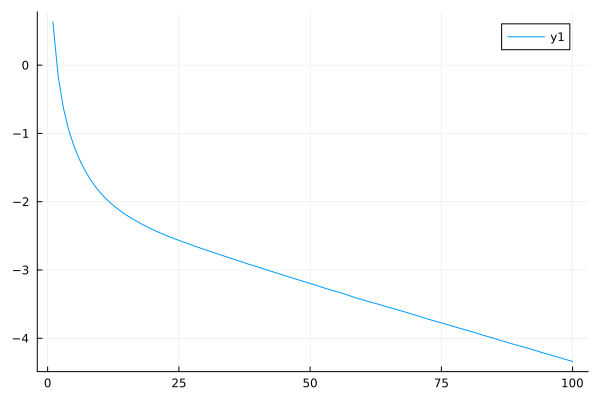

In [145]:
plot(mse_pcd)